In [108]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [109]:
# DATA LOADING AND CLEANING
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [111]:
df.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [112]:
df[df['day'] == 'day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [113]:
df[df['day'] == 'day'].index[0]

np.int64(123)

In [114]:
separator_index = df[df['day'] == 'day'].index[0]
df_bejaia = df.iloc[:separator_index]
df_sidi = df.iloc[separator_index + 1:]

In [115]:
df_bejaia.loc[:,'Region'] = 'Bejaia'
df_sidi.loc[:,'Region'] = 'Sidi-Bel Abbes'

/tmp/ipython-input-3277840677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bejaia.loc[:,'Region'] = 'Bejaia'
/tmp/ipython-input-3277840677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sidi.loc[:,'Region'] = 'Sidi-Bel Abbes'


In [116]:
df = pd.concat([df_bejaia, df_sidi], ignore_index=True)

In [117]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
241,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
242,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
243,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [118]:
df.columns = df.columns.str.strip()

In [119]:
numeric_cols = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       245 non-null    object 
dtypes: float64(13), object(2)
memory usage: 28.8+ KB


In [121]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [122]:
df['Classes'] = df['Classes'].str.strip()

In [123]:
df['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [124]:
df['Classes'] = np.where(df['Classes'] == 'fire', 1, 0)

In [125]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,Bejaia
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,Bejaia
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,Bejaia
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,Bejaia
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,Sidi-Bel Abbes
241,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,Sidi-Bel Abbes
242,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,Sidi-Bel Abbes
243,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,Sidi-Bel Abbes


In [126]:
df.dropna(inplace=True)

In [127]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


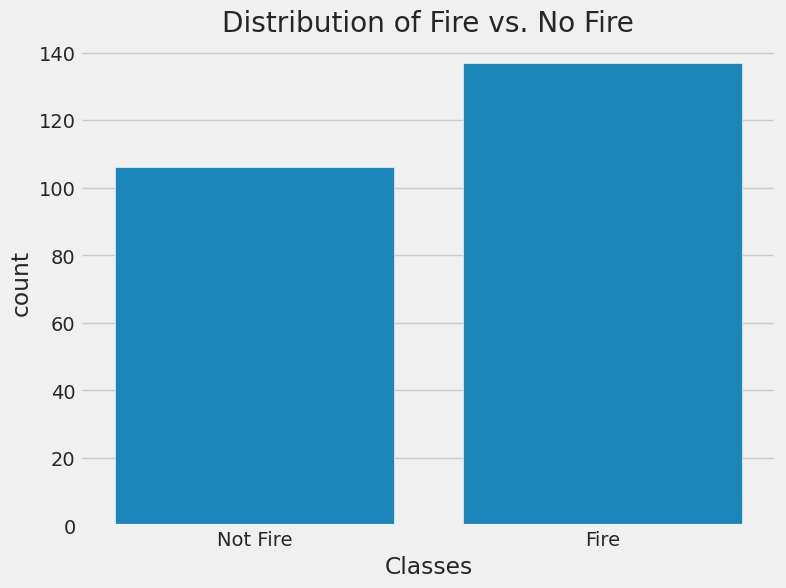

In [128]:
#EDA
plt.figure(figsize=(8, 6))
sns.countplot(x='Classes', data=df)
plt.title('Distribution of Fire vs. No Fire')
plt.xticks([0, 1], ['Not Fire', 'Fire'])
plt.show()

In [129]:
X = df.drop(['day', 'month', 'year', 'Region', 'Classes'], axis=1)
y = df['Classes']


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [131]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
232,36.0,33.0,13.0,0.1,90.6,25.8,77.8,9.0,28.2,15.4
220,34.0,71.0,14.0,6.5,64.5,3.3,9.1,1.0,3.5,0.4
186,39.0,33.0,17.0,0.0,93.7,17.1,32.1,17.2,16.9,19.5
235,35.0,34.0,17.0,0.0,92.2,23.6,97.3,13.8,29.4,21.6
206,36.0,43.0,16.0,0.0,91.2,46.1,137.7,11.5,50.2,24.5


In [132]:
X_test.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
181,34.0,59.0,16.0,0.0,88.1,19.5,47.2,7.4,19.5,10.9
161,36.0,43.0,15.0,1.9,82.3,9.4,9.9,3.2,9.0,3.1
160,35.0,47.0,18.0,6.0,80.8,9.8,9.7,3.1,9.4,3.0
172,36.0,50.0,16.0,0.0,89.9,32.7,71.0,9.5,32.6,17.3
223,30.0,80.0,15.0,0.0,83.1,7.9,34.5,3.5,10.0,3.7


In [133]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (182, 10)
Testing set shape: (61, 10)


In [134]:
X_train_scaled

array([[ 1.01365171, -1.8394432 , -0.88892151, ...,  0.89709937,
         0.7278858 ,  1.0048957 ],
       [ 0.47735924,  0.64088224, -0.54024971, ..., -0.91779112,
        -0.93868129, -0.91743998],
       [ 1.81809043, -1.8394432 ,  0.50576569, ...,  2.75736213,
        -0.03455178,  1.53033412],
       ...,
       [-0.32707948, -0.46873704, -1.58626511, ..., -0.57749915,
        -0.75650594, -0.75083756],
       [-0.32707948,  0.44506707, -0.54024971, ..., -0.1010904 ,
        -0.21672713, -0.199768  ],
       [-0.05893324, -0.86036737,  0.85443749, ...,  1.84991688,
         1.79394897,  2.28645282]])

In [135]:
X_test_scaled[-5:]

array([[ 0.47735924, -0.14237843,  0.15709389, -0.36388205,  0.68572934,
         0.33658831, -0.09003854,  0.53412127,  0.14087634,  0.42819499],
       [ 1.01365171, -1.18672598, -0.19157791,  0.50212217,  0.27902303,
        -0.45390183, -0.85084964, -0.41869623, -0.56758336, -0.57141956],
       [ 0.74550548, -0.92563909,  0.85443749,  2.37086814,  0.17384036,
        -0.42259529, -0.85492905, -0.44138236, -0.54059442, -0.58423513],
       [ 1.01365171, -0.72982393,  0.15709389, -0.36388205,  0.81194853,
         1.36970415,  0.39541197,  1.01053003,  1.02476415,  1.24839155],
       [-0.59522572,  1.22832774, -0.19157791, -0.36388205,  0.33512045,
        -0.57130136, -0.34908146, -0.35063784, -0.50011101, -0.49452613]])

In [136]:
# Logistic Model training
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [137]:
y_pred = model.predict(X_test_scaled)

print("Accuracy: ",round(accuracy_score(y_test, y_pred),3))
print("Precision: ",round(precision_score(y_test, y_pred),3))
print("Recall: ",round(recall_score(y_test, y_pred),3))
print("F1-Score: ",round(f1_score(y_test, y_pred),3))

Accuracy:  0.885
Precision:  0.967
Recall:  0.829
F1-Score:  0.892



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        26
           1       0.97      0.83      0.89        35

    accuracy                           0.89        61
   macro avg       0.89      0.90      0.88        61
weighted avg       0.90      0.89      0.89        61



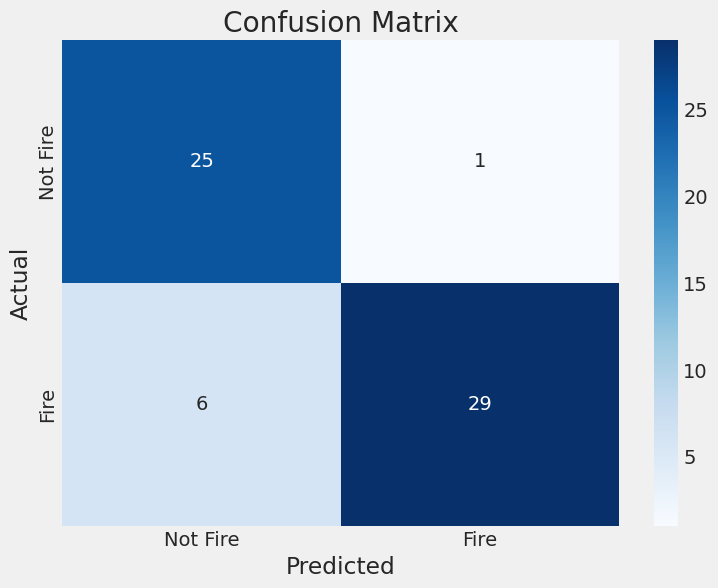

In [138]:
# Display the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fire', 'Fire'], yticklabels=['Not Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [139]:
# Create a new sample data point
new_sample = pd.DataFrame({
    'Temperature': [25.0],
    'RH': [85.0],
    'Ws': [13.0],
    'Rain': [2.0],
    'FFMC': [30.0],
    'DMC': [1.0],
    'DC': [7.0],
    'ISI': [0.0],
    'BUI': [2.0],
    'FWI': [0.0]
})


predicted_class = model.predict(scaler.transform(new_sample))

# Print the prediction
if predicted_class[0] == 1:
    print("Prediction for the new sample: Fire")
else:
    print("Prediction for the new sample: Not Fire")

Prediction for the new sample: Not Fire


In [140]:
# Create a new sample data point
new_sample = pd.DataFrame({
    'Temperature': [30.0],
    'RH': [50.0],
    'Ws': [15.0],
    'Rain': [0.0],
    'FFMC': [85.0],
    'DMC': [15.0],
    'DC': [40.0],
    'ISI': [5.0],
    'BUI': [15.0],
    'FWI': [6.0]
})


predicted_class = model.predict(scaler.transform(new_sample))

# Print the prediction
if predicted_class[0] == 1:
    print("Prediction for the new sample: Fire")
else:
    print("Prediction for the new sample: Not Fire")

Prediction for the new sample: Fire


In [141]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

In [142]:
#Decision tree model
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=0)

In [143]:
y_pred1 = dt.predict(X_test_scaled)

In [144]:
print("Accuracy: ",round(accuracy_score(y_test, y_pred1),3))
print("Precision: ",round(precision_score(y_test, y_pred1),3))
print("Recall: ",round(recall_score(y_test, y_pred1),3))
print("F1-Score: ",round(f1_score(y_test, y_pred1),3))

Accuracy:  0.967
Precision:  1.0
Recall:  0.943
F1-Score:  0.971



Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.94      0.97        35

    accuracy                           0.97        61
   macro avg       0.96      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



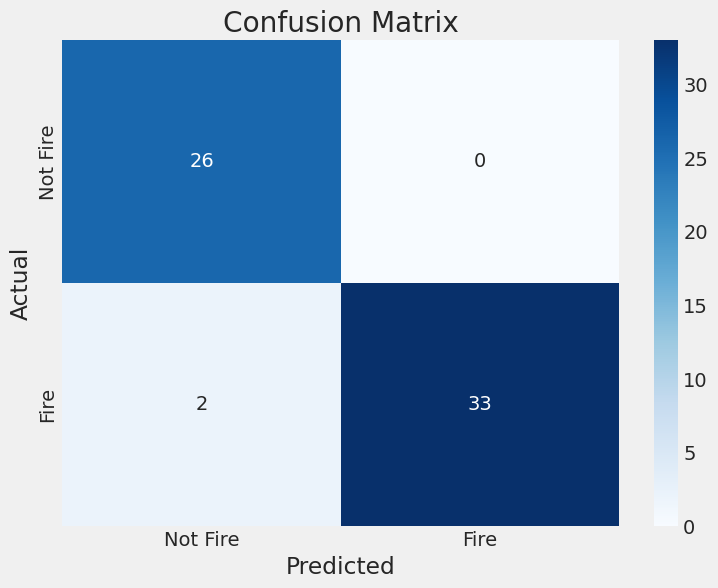

In [145]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

# Display the Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fire', 'Fire'], yticklabels=['Not Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [146]:
# Same sample data point to predict
new_sample = pd.DataFrame({
    'Temperature': [25.0],
    'RH': [85.0],
    'Ws': [13.0],
    'Rain': [2.0],
    'FFMC': [30.0],
    'DMC': [1.0],
    'DC': [7.0],
    'ISI': [0.0],
    'BUI': [2.0],
    'FWI': [0.0]
})


predicted_class = model.predict(scaler.transform(new_sample))

# Print the prediction
if predicted_class[0] == 1:
    print("Prediction for the new sample: Fire")
else:
    print("Prediction for the new sample: Not Fire")

Prediction for the new sample: Not Fire


In [147]:
new_sample = pd.DataFrame({
    'Temperature': [30.0],
    'RH': [50.0],
    'Ws': [15.0],
    'Rain': [0.0],
    'FFMC': [85.0],
    'DMC': [15.0],
    'DC': [40.0],
    'ISI': [5.0],
    'BUI': [15.0],
    'FWI': [6.0]
})


predicted_class = model.predict(scaler.transform(new_sample))

# Print the prediction
if predicted_class[0] == 1:
    print("Prediction for the new sample: Fire")
else:
    print("Prediction for the new sample: Not Fire")

Prediction for the new sample: Fire
